<a href="https://colab.research.google.com/github/HappyGithub-dev/Pruning_Network/blob/main/Solution_Code_to_RoboReg_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
## Import all necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Data loading
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='../data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='../data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)
## MNIST (Modified National Institute of Standards and Technology) dataset is dataset of handwritten digits. We would work on training and pruning of handwritten digits.
## Preset training and testing fractions are 6/7 and 1/7 respectively.
## Simple training without pruning

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 5 * 5 * 16)  # Adjusted flattening
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Instantiate the model and set up optimizer and loss function
torch.manual_seed(36)
model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)             # Loss finding step to check the difference
        predicted = torch.max(y_pred.data, 1)[1]                          ## Find the predicition based on the given model and forward function, check with what the actual training data is .
        batch_corr = (predicted == y_train).sum().item()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 600 == 0:                            # Not necessarily 600 , can be any other number
            print(f'epoch: {i}  batch: {b}  loss: {loss.item()}')

    train_losses.append(loss.item())
    train_correct.append(trn_corr)

    with torch.no_grad():                      ## torch.no_grad ensures that whatever weight was used during training remains during the testing phase as well, no_grad = no change in weight/gradient .
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum().item()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    if test_losses:
       avg_test_loss = sum(test_losses) / len(test_losses)
       print(f"epoch {i}: Average Test Loss: {avg_test_loss}")
    test_correct.append(tst_corr)

    test_acc = tst_corr / len(test_data) * 100
    print(f"Epoch {i}: Test Accuracy: {test_acc:.2f}%")



epoch: 0  batch: 600  loss: 0.040801286697387695
epoch: 0  batch: 1200  loss: 0.24855050444602966
epoch: 0  batch: 1800  loss: 0.027155891060829163
epoch: 0  batch: 2400  loss: 0.1461646854877472
epoch: 0  batch: 3000  loss: 0.2589845061302185
epoch: 0  batch: 3600  loss: 0.021197175607085228
epoch: 0  batch: 4200  loss: 0.11338480561971664
epoch: 0  batch: 4800  loss: 0.03924586623907089
epoch: 0  batch: 5400  loss: 0.6657552719116211
epoch: 0  batch: 6000  loss: 0.02631903626024723
epoch 0: Average Test Loss: 0.004304179921746254
Epoch 0: Test Accuracy: 96.10%
epoch: 1  batch: 600  loss: 0.04975535348057747
epoch: 1  batch: 1200  loss: 0.034018680453300476
epoch: 1  batch: 1800  loss: 0.07127867639064789
epoch: 1  batch: 2400  loss: 0.022431345656514168
epoch: 1  batch: 3000  loss: 0.2589156925678253
epoch: 1  batch: 3600  loss: 0.856357216835022
epoch: 1  batch: 4200  loss: 0.06102684885263443
epoch: 1  batch: 4800  loss: 0.0022716184612363577
epoch: 1  batch: 5400  loss: 0.00293570

Average Test Accuracy = 96.49%

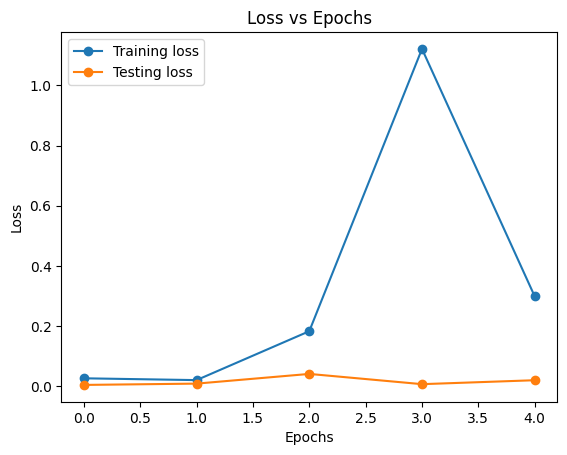

In [20]:
## Graphing out some basic results
plt.plot(train_losses, label='Training loss', marker='o')
plt.plot(test_losses, label='Testing loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

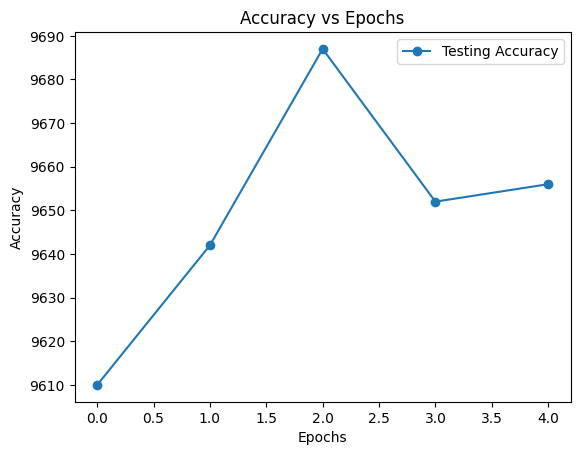

In [21]:
# Accuracy vs epochs

plt.plot(test_correct, label='Testing Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

In [ ]:
## Testing on a randomnly given imagen to check how good the model actually is .

In [22]:
random = test_data[100]
random

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.4980, 0.8667, 0.2039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.2510, 0.8980, 0.8588, 0.4078, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

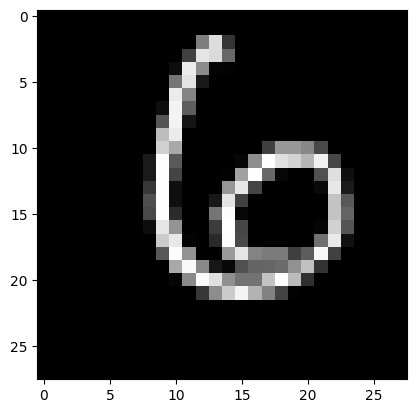

In [25]:
plt.imshow(random[0][0], cmap='gray')

This tells us that our random image is supposed be the digit 6.

In [30]:
model.eval()
with torch.no_grad():
    output = model(random[0].view(1, 1, 28, 28))
output

tensor([[ -47.5829,  -51.9530,  -32.9320,  -46.4502,  -27.4845,  -19.1980,
            0.0000, -157.8389,  -27.3901,  -72.1576]])

The largest element in this tensor is 0 , corresponds to the digit 6 .


In [31]:
output.argmax()

tensor(6)

This last cell verifies our claim .

In [61]:
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F

In [63]:
cl1 = model.conv1
print(list(cl1.named_parameters()))

[('bias', Parameter containing:
tensor([-0.6561, -0.3398,  0.3163, -0.8903, -0.5071,  0.0298],
       requires_grad=True)), ('weight_orig', Parameter containing:
tensor([[[[ 0.3016, -1.4817, -0.3313],
          [ 0.5213, -0.1784, -0.4329],
          [ 0.0511,  0.6061,  0.8218]]],


        [[[-0.9555,  0.2549,  0.7695],
          [-2.9746, -0.7352,  0.2318],
          [ 1.0570, -1.3620, -1.5593]]],


        [[[-0.5122, -0.6679,  0.1736],
          [-0.7676, -2.2628, -2.6725],
          [-0.2768, -0.8008, -2.3680]]],


        [[[ 0.3111, -0.9945, -2.6575],
          [-0.2935, -1.3723, -0.5440],
          [-0.8126, -1.5939,  0.4668]]],


        [[[ 0.2028, -0.2312, -0.0036],
          [ 0.2358,  0.0076, -0.7330],
          [ 0.0462, -0.8525, -0.5704]]],


        [[[ 0.4363,  0.1654,  0.3758],
          [-0.3997,  0.7045, -0.6042],
          [-1.8303, -1.0201, -1.0708]]]], requires_grad=True))]


In [67]:
prune.random_unstructured(cl1 , name="weight", amount=0.3)

Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))

In [68]:
print(cl1.weight)

tensor([[[[ 0.0000, -0.0000, -0.0000],
          [ 0.0000, -0.0000, -0.0000],
          [ 0.0000,  0.0000,  0.0000]]],


        [[[-0.0000,  0.0000,  0.0000],
          [-0.0000, -0.0000,  0.0000],
          [ 0.0000, -0.0000, -0.0000]]],


        [[[-0.0000, -0.0000,  0.0000],
          [-0.7676, -0.0000, -0.0000],
          [-0.0000, -0.0000, -0.0000]]],


        [[[ 0.0000, -0.0000, -0.0000],
          [-0.0000, -0.0000, -0.0000],
          [-0.0000, -0.0000,  0.0000]]],


        [[[ 0.2028, -0.2312, -0.0000],
          [ 0.0000,  0.0000, -0.0000],
          [ 0.0000, -0.0000, -0.0000]]],


        [[[ 0.0000,  0.0000,  0.0000],
          [-0.0000,  0.0000, -0.0000],
          [-0.0000, -0.0000, -0.0000]]]], grad_fn=<MulBackward0>)


In [89]:
weight_sparsity1 = (cl1.weight.data == 0).sum() / cl1.weight.data.nelement()
print(f"Sparsity: {weight_sparsity1 * 100:.2f}%")

Sparsity: 94.44%


94.44% of the weights are pruned.


In [70]:
prune.random_unstructured(cl1 , name="bias", amount=0.3)

Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))

In [71]:
print(cl1.bias)

tensor([-0.0000, -0.0000,  0.3163, -0.8903, -0.5071,  0.0298],
       grad_fn=<MulBackward0>)


In [90]:
bias_sparsity1 = (cl1.bias.data == 0).sum() / cl1.bias.data.nelement()
print(f"Sparsity: {bias_sparsity1 * 100:.2f}%")

Sparsity: 33.33%


33.33% of the biases are pruned

In [74]:
cl2 = model.conv2
print(list(cl2.named_parameters()))


[('weight', Parameter containing:
tensor([[[[-2.9197e-01, -1.7541e-01, -2.3538e-01],
          [-8.2795e-02, -2.2047e-01, -2.1868e-01],
          [-2.0774e-01, -1.1213e-01, -1.2101e-01]],

         [[-2.0195e-01, -1.3985e-01, -3.4199e-02],
          [-1.4097e-01, -2.2332e-01, -1.4884e-01],
          [-2.1444e-01, -1.4968e-01, -1.8975e-01]],

         [[-1.2604e-01, -2.2766e-01, -9.6804e-02],
          [-1.8803e-01, -1.3268e-01, -2.2254e-01],
          [-7.3495e-02, -1.0914e-01, -1.9508e-01]],

         [[-3.6320e-02, -6.5639e-02,  5.4846e-02],
          [-1.2200e-01, -1.6023e-01, -1.2559e-02],
          [-8.8119e-02, -5.0519e-02, -2.3818e-01]],

         [[-1.5026e-02, -1.4169e-01, -2.2425e-01],
          [-2.4480e-01, -1.6766e-01, -1.8091e-01],
          [-2.2163e-01, -2.5864e-01, -9.7141e-02]],

         [[ 2.2959e-02, -2.5311e-01, -8.0048e-02],
          [-1.4205e-01, -7.8835e-02, -2.3098e-01],
          [ 1.6091e-01, -2.8292e-01, -2.1960e-01]]],


        [[[ 2.4860e-01,  5.4925e-0

In [75]:
print(cl2.weight)

Parameter containing:
tensor([[[[-2.9197e-01, -1.7541e-01, -2.3538e-01],
          [-8.2795e-02, -2.2047e-01, -2.1868e-01],
          [-2.0774e-01, -1.1213e-01, -1.2101e-01]],

         [[-2.0195e-01, -1.3985e-01, -3.4199e-02],
          [-1.4097e-01, -2.2332e-01, -1.4884e-01],
          [-2.1444e-01, -1.4968e-01, -1.8975e-01]],

         [[-1.2604e-01, -2.2766e-01, -9.6804e-02],
          [-1.8803e-01, -1.3268e-01, -2.2254e-01],
          [-7.3495e-02, -1.0914e-01, -1.9508e-01]],

         [[-3.6320e-02, -6.5639e-02,  5.4846e-02],
          [-1.2200e-01, -1.6023e-01, -1.2559e-02],
          [-8.8119e-02, -5.0519e-02, -2.3818e-01]],

         [[-1.5026e-02, -1.4169e-01, -2.2425e-01],
          [-2.4480e-01, -1.6766e-01, -1.8091e-01],
          [-2.2163e-01, -2.5864e-01, -9.7141e-02]],

         [[ 2.2959e-02, -2.5311e-01, -8.0048e-02],
          [-1.4205e-01, -7.8835e-02, -2.3098e-01],
          [ 1.6091e-01, -2.8292e-01, -2.1960e-01]]],


        [[[ 2.4860e-01,  5.4925e-01, -3.2827e-

In [76]:
print(cl2.bias)

Parameter containing:
tensor([-0.2742, -0.0712, -0.2182, -0.1355,  0.1564, -0.2208, -0.1274,  0.4800,
        -0.1840, -0.5651, -0.0856, -0.4983, -0.0971, -0.0664, -0.1941, -0.4550],
       requires_grad=True)


In [77]:
prune.random_unstructured(cl2, name="weight", amount=0.3)

Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))

In [78]:
print(cl2.weight)

tensor([[[[-2.9197e-01, -0.0000e+00, -2.3538e-01],
          [-0.0000e+00, -2.2047e-01, -2.1868e-01],
          [-2.0774e-01, -0.0000e+00, -1.2101e-01]],

         [[-2.0195e-01, -0.0000e+00, -3.4199e-02],
          [-1.4097e-01, -0.0000e+00, -1.4884e-01],
          [-0.0000e+00, -1.4968e-01, -1.8975e-01]],

         [[-1.2604e-01, -2.2766e-01, -9.6804e-02],
          [-1.8803e-01, -1.3268e-01, -2.2254e-01],
          [-0.0000e+00, -1.0914e-01, -1.9508e-01]],

         [[-3.6320e-02, -6.5639e-02,  5.4846e-02],
          [-1.2200e-01, -1.6023e-01, -1.2559e-02],
          [-8.8119e-02, -5.0519e-02, -2.3818e-01]],

         [[-0.0000e+00, -1.4169e-01, -0.0000e+00],
          [-2.4480e-01, -1.6766e-01, -0.0000e+00],
          [-2.2163e-01, -2.5864e-01, -9.7141e-02]],

         [[ 2.2959e-02, -0.0000e+00, -8.0048e-02],
          [-1.4205e-01, -0.0000e+00, -2.3098e-01],
          [ 1.6091e-01, -0.0000e+00, -0.0000e+00]]],


        [[[ 0.0000e+00,  0.0000e+00, -0.0000e+00],
          [ 0.000

In [83]:
weight_sparsity2 = (cl2.weight.data == 0).sum() / cl2.weight.data.nelement()
print(f"Sparsity: {weight_sparsity2 * 100:.2f}%")

Sparsity: 29.98%


29.98% of the weights have been pruned

In [86]:
prune.random_unstructured(cl2, name="bias", amount=0.3)

Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))

In [88]:
print(cl2.bias)

tensor([-0.0000, -0.0712, -0.2182, -0.1355,  0.1564, -0.2208, -0.0000,  0.0000,
        -0.1840, -0.0000, -0.0856, -0.0000, -0.0971, -0.0664, -0.1941, -0.4550],
       grad_fn=<MulBackward0>)


In [87]:
bias_sparsity2 = (cl2.bias.data == 0).sum() / cl2.bias.data.nelement()
print(f"Sparsity: {bias_sparsity2 * 100:.2f}%")

Sparsity: 31.25%


31.25% of the biases have been pruned.

In [97]:
print(cl1)

Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))


In [103]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
      if name == "conv1":
        model.conv1 = cl1
      elif name == "conv2":
        model.conv2 = cl2


In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [16]:

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 600 == 0:
            print(f'epoch: {i}  batch: {b}  loss: {loss.item()}')

    train_losses.append(loss.item())
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum().item()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    if test_losses:
       avg_test_loss = sum(test_losses) / len(test_losses)
       print(f"epoch {i}: Average Test Loss: {avg_test_loss}")
    test_correct.append(tst_corr)

    test_acc = tst_corr / len(test_data) * 100
    print(f"Epoch {i}: Test Accuracy: {test_acc:.2f}%")


epoch: 0  batch: 600  loss: 0.01044799480587244
epoch: 0  batch: 1200  loss: 0.0383114367723465
epoch: 0  batch: 1800  loss: 0.0022393460385501385
epoch: 0  batch: 2400  loss: 0.02687985822558403
epoch: 0  batch: 3000  loss: 0.003188878996297717
epoch: 0  batch: 3600  loss: 0.10026764869689941
epoch: 0  batch: 4200  loss: 0.07550647109746933
epoch: 0  batch: 4800  loss: 0.001787097891792655
epoch: 0  batch: 5400  loss: 0.00787337590008974
epoch: 0  batch: 6000  loss: 0.14560212194919586
epoch 0: Average Test Loss: 0.03700747340917587
Epoch 0: Test Accuracy: 96.59%
epoch: 1  batch: 600  loss: 0.002541531575843692
epoch: 1  batch: 1200  loss: 0.005617078859359026
epoch: 1  batch: 1800  loss: 0.0026692659594118595
epoch: 1  batch: 2400  loss: 0.020984234288334846
epoch: 1  batch: 3000  loss: 0.3789822459220886
epoch: 1  batch: 3600  loss: 0.01287914626300335
epoch: 1  batch: 4200  loss: 0.04014044255018234
epoch: 1  batch: 4800  loss: 0.040385328233242035
epoch: 1  batch: 5400  loss: 0.02

Average accuracy = 96.69%

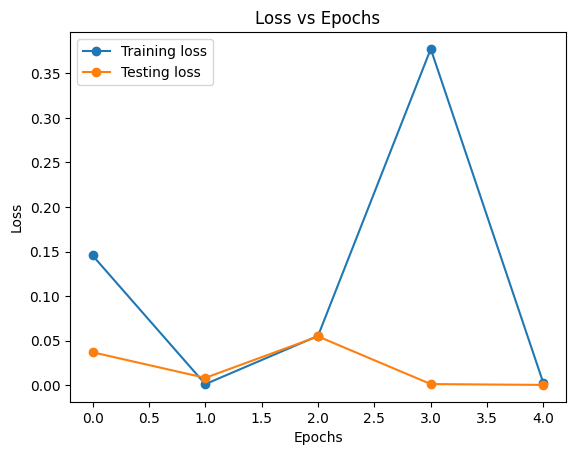

In [5]:
plt.plot(train_losses, label='Training loss', marker='o')
plt.plot(test_losses, label='Testing loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

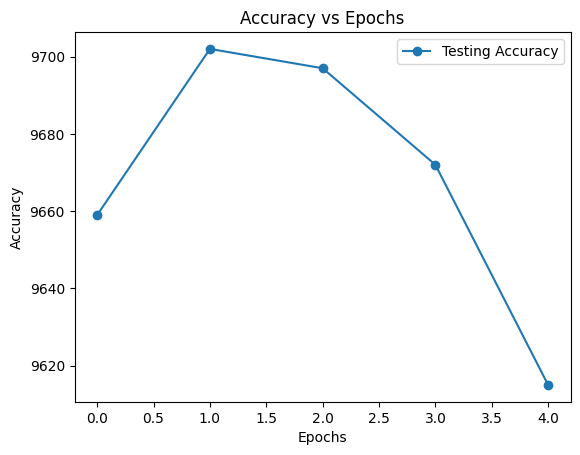

In [6]:
plt.plot(test_correct, label='Testing Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

So what we can see is that the accuracy has improved overall . For 4 out of the 5 epochs , the accuracy was higher than simple training and testing .

In [7]:
random = test_data[100]
random

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.4980, 0.8667, 0.2039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.2510, 0.8980, 0.8588, 0.4078, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

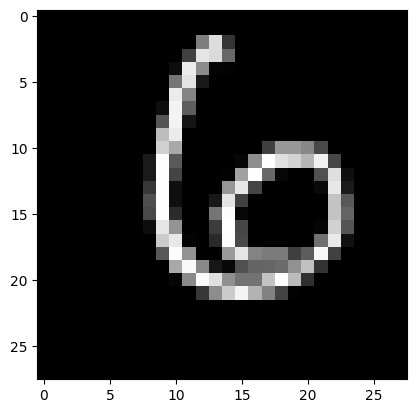

In [8]:
plt.imshow(random[0][0], cmap='gray')

In [9]:
model.eval()
with torch.no_grad():
    output = model(random[0].view(1, 1, 28, 28))
output

tensor([[ -39.8374,  -62.6402,  -53.8076,  -91.8910,  -26.2407,  -29.2221,
            0.0000, -255.7115,  -51.0222, -157.0950]])

In [11]:
output.argmax()

tensor(6)

So as we can see the pruned model has also done equally good on this random test data .